# Импорты

In [1]:
from os.path import join as pjoin
import tqdm

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchinfo
from  torch.optim.lr_scheduler import ReduceLROnPlateau
from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score, MulticlassPrecision, MulticlassRecall

import torchvision.transforms as transforms
import torchvision
import torchvision.models

import matplotlib.pyplot as plt

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Содержание

- Файл simpson-set.tar.gz: Это набор данных изображений: 20 папок (по одной для каждого персонажа) с 400-2000 изображениями в каждой папке.
- Файл simpson-test-set.zip. : Предварительный просмотр набора данных изображения
- Файл weights.best.h5 : рассчитанные веса для прогнозирования в ядрах.
- Файл annotation.txt: файл аннотации для ограничивающих рамок для каждого символа.

In [2]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)

# print(model)
print(torchinfo.summary(model, input_size=(128, 3, 64, 64), depth=4))

Using cache found in C:\Users\emely/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [128, 1000]               --
├─Conv2d: 1-1                            [128, 64, 32, 32]         9,408
├─BatchNorm2d: 1-2                       [128, 64, 32, 32]         128
├─ReLU: 1-3                              [128, 64, 32, 32]         --
├─MaxPool2d: 1-4                         [128, 64, 16, 16]         --
├─Sequential: 1-5                        [128, 256, 16, 16]        --
│    └─Bottleneck: 2-1                   [128, 256, 16, 16]        --
│    │    └─Conv2d: 3-1                  [128, 64, 16, 16]         4,096
│    │    └─BatchNorm2d: 3-2             [128, 64, 16, 16]         128
│    │    └─ReLU: 3-3                    [128, 64, 16, 16]         --
│    │    └─Conv2d: 3-4                  [128, 64, 16, 16]         36,864
│    │    └─BatchNorm2d: 3-5             [128, 64, 16, 16]         128
│    │    └─ReLU: 3-6                    [128, 64, 16, 16]         --
│ 

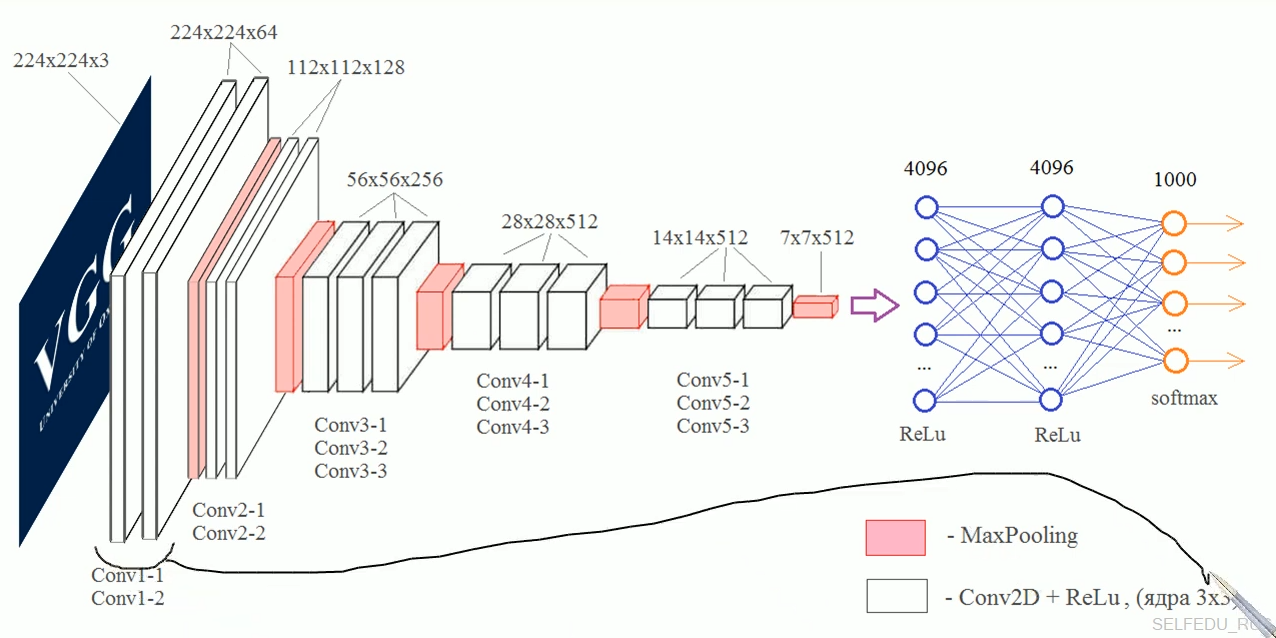

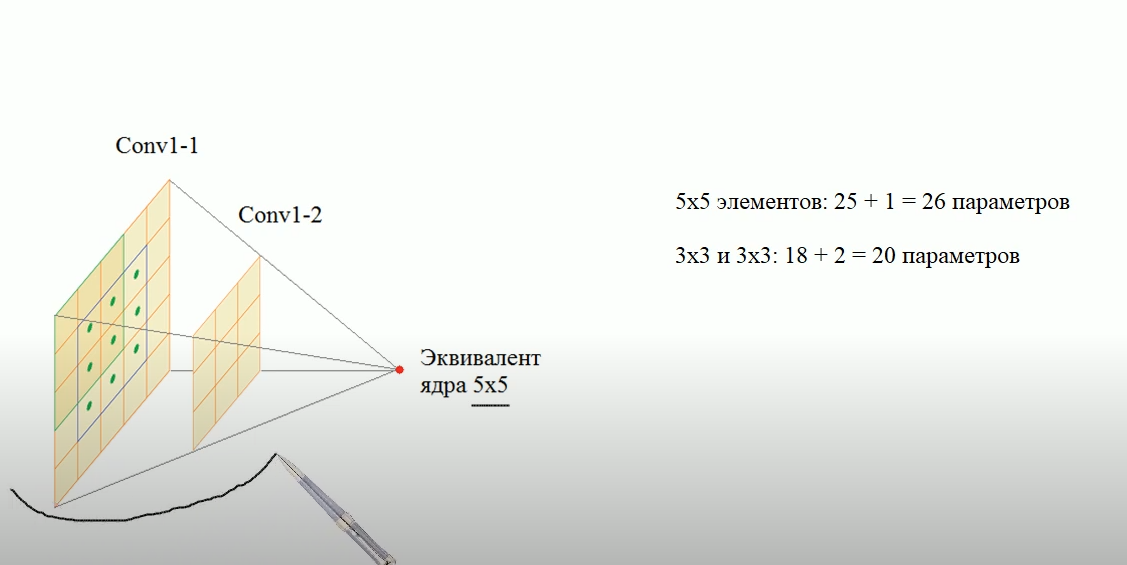